In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import matplotlib
import matplotlib.font_manager as font_manager

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Helvetica') 

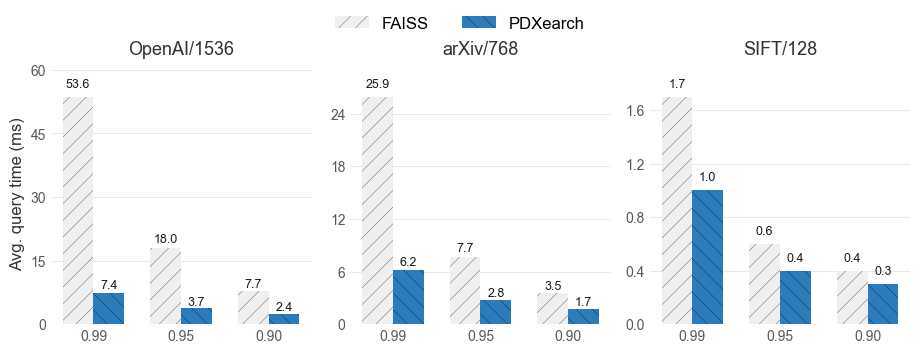

In [60]:
mpl.rcParams['hatch.linewidth'] = 0.2

# Data
x_labels = ["0.99", "0.95", "0.90"]
x = np.arange(len(x_labels))
bar_width = 0.35

# Query time data (FAISS, PDXearch)
data = {
    "OpenAI/1536": {
        "FAISS": [53.6, 18.0, 7.7],
        "PDXearch": [7.4, 3.7, 2.4]
    },
    "arXiv/768": {
        "FAISS": [25.9, 7.7, 3.5],
        "PDXearch": [6.2, 2.8, 1.7]
    },
    "SIFT/128": {
        "FAISS": [1.7, 0.6, 0.4],
        "PDXearch": [1.0, 0.4, 0.3]
    }
}

fig, axes = plt.subplots(1, 3, figsize=(9.3, 3.5), sharey=False)

colors = {
    "FAISS": "#efefef",
    "PDXearch": "#2c7bba"
}
hatches = {
    "FAISS": "//",
    "PDXearch": "\\\\"
}

# Font settings (estimated)
label_fontsize = 12
tick_fontsize = 10
x_tick_fontsize = 10
bar_label_fontsize = 9
font_color = "#333333"
tick_fonts_color = '#585858'
bar_text_color = '#191919'

for ax, (title, values) in zip(axes, data.items()):
    faiss_vals = values["FAISS"]
    pdx_vals = values["PDXearch"]
    
    # Bars
    ax.bar(x - bar_width / 2, faiss_vals, width=bar_width, label="FAISS",
           color=colors["FAISS"], hatch=hatches["FAISS"])
    ax.bar(x + bar_width / 2, pdx_vals, width=bar_width, label="PDXearch",
           color=colors["PDXearch"], hatch=hatches["PDXearch"])
    
    # Bar value labels
    for i in range(len(x)):
        offset_faiss = max(0.05, faiss_vals[i] * 0.03)
        offset_pdx   = max(0.05, pdx_vals[i] * 0.03)
    
        ax.text(x[i] - bar_width / 2, faiss_vals[i] + offset_faiss, f"{faiss_vals[i]:.1f}", 
                ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
        ax.text(x[i] + bar_width / 2, pdx_vals[i] + offset_pdx, f"{pdx_vals[i]:.1f}", 
                ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    
    # Ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=x_tick_fontsize, color=tick_fonts_color)
    ax.set_title(title, fontsize=label_fontsize + 1, color=font_color)
    
    # Grids (horizontal only)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='gray', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Spine adjustments (remove top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Y label only for first plot
    if title == "OpenAI/1536":
        ax.set_ylabel("Avg. query time (ms)", fontsize=label_fontsize, color=font_color)

    # Set consistent Y limits per dataset
    max_y = max(max(faiss_vals), max(pdx_vals))
    ax.set_ylim(0, max_y * 1.15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.tick_params(axis='y', colors=tick_fonts_color)
    ax.tick_params(axis='both', length=0)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False, fontsize=label_fontsize, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'./BENCHA.png', format='png', dpi=600, bbox_inches='tight')

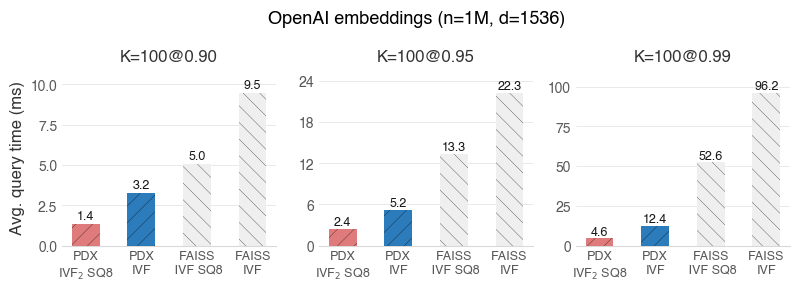

In [79]:
mpl.rcParams['hatch.linewidth'] = 0.2

# Data
x_labels = ["PDX\nIVF$_2$ SQ8", "PDX\nIVF", "FAISS\n IVF SQ8", "FAISS\nIVF"]
x = np.arange(len(x_labels))
bar_width = 0.5

# Query time data (FAISS, PDXearch)
data = {
    "K=100@0.90": [
        1.36, 3.25, 5.04, 9.49
    ],
    "K=100@0.95": [
        2.38, 5.19, 13.32, 22.31
    ],
    "K=100@0.99": [
        4.58, 12.45, 52.56, 96.24
    ]
}

categories = ["PDX\nIVF$_2$ SQ8", "PDX\nIVF", "FAISS\n IVF SQ8", "FAISS\nIVF"]
colors = ["#e07b7b", "#2c7bba", "#efefef", "#efefef"]
hatches = ["//", "//", "\\\\", "\\\\"]

fig, axes = plt.subplots(1, 3, figsize=(8.1, 3.1), sharey=False, tight_layout=True)

label_fontsize = 12
tick_fontsize = 10
x_tick_fontsize = 9
bar_label_fontsize = 9
font_color = "#333333"
tick_fonts_color = '#585858'
bar_text_color = '#191919'

for ax, (title, values) in zip(axes, data.items()):

    bars = []
    for i in range(len(categories)):
        bar = ax.bar(categories[i], values[i], width=bar_width, color=colors[i], hatch=hatches[i], label=categories[i])
        bars.append(bar)
    
    # Add value labels on top
    for bar_group in bars:
        bar = bar_group[0]
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f"{height:.1f}", ha='center', va='bottom', fontsize=9, color=bar_text_color)
    
    # Bars
    # bars = ax.bar(categories, values, color=colors)
    # for bar in bars:
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
    #             f"{height:.1f}", ha='center', va='bottom')
    # ax.bar(x - bar_width / 2, faiss_vals, width=bar_width, label="FAISS",
    #        color=colors["FAISS"], hatch=hatches["FAISS"])
    # ax.bar(x + bar_width / 2, pdx_vals, width=bar_width, label="PDXearch",
    #        color=colors["PDXearch"], hatch=hatches["PDXearch"])
    
    # # Bar value labels
    # for i in range(len(x)):
    #     offset_faiss = max(0.05, faiss_vals[i] * 0.03)
    #     offset_pdx   = max(0.05, pdx_vals[i] * 0.03)
    
    #     ax.text(x[i] - bar_width / 2, faiss_vals[i] + offset_faiss, f"{faiss_vals[i]:.1f}", 
    #             ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    #     ax.text(x[i] + bar_width / 2, pdx_vals[i] + offset_pdx, f"{pdx_vals[i]:.1f}", 
    #             ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    
    # Ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=x_tick_fontsize, color=tick_fonts_color)
    ax.set_title(title, fontsize=label_fontsize, color=font_color)
    
    # Grids (horizontal only)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='gray', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Spine adjustments (remove top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color((0, 0, 0, 0.15))

    # Y label only for first plot
    if title == "K=100@0.90":
        ax.set_ylabel("Avg. query time (ms)", fontsize=label_fontsize, color=font_color)

    # Set consistent Y limits per dataset
    max_y = max(values)
    ax.set_ylim(0, max_y * 1.15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.tick_params(axis='y', colors=tick_fonts_color)
    ax.tick_params(axis='both', length=0)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower center", ncol=4, frameon=False, fontsize=8, bbox_to_anchor=(0.5, -0.1))
fig.suptitle('OpenAI embeddings (n=1M, d=1536)', fontsize=13, x=0.52, y=0.925)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'./openai-intel.png', format='png', dpi=600, bbox_inches='tight')

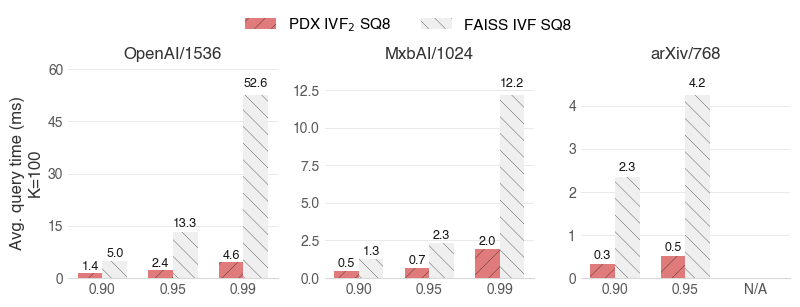

In [161]:
mpl.rcParams['hatch.linewidth'] = 0.2

# Data
x_labels = ["0.90", "0.95", "0.99"]
x = np.arange(len(x_labels))
bar_width = 0.35

# Query time data (FAISS, PDXearch)
data = {
    "OpenAI/1536": {
        "PDX IVF": [ 1.36, 2.38, 4.58],
        "FAISS IVF SQ8": [5.04, 13.32, 52.56],
    },
    "MxbAI/1024": {
        "PDX IVF": [0.47, 0.70, 1.96],
        "FAISS IVF SQ8": [ 1.30,  2.34, 12.17],
    },
    "arXiv/768": {
        "PDX IVF": [ 0.33, 0.51, 0],
        "FAISS IVF SQ8": [2.34, 4.25, 0],
    }
}

fig, axes = plt.subplots(1, 3, figsize=(8.1, 2.95), sharey=False)

colors = {
    "PDX IVF": "#e07b7b",
    "FAISS IVF SQ8": "#efefef",
}
hatches = {
    "PDX IVF": "//",
    "FAISS IVF SQ8": "\\\\",
}

# Font settings (estimated)
label_fontsize = 12
tick_fontsize = 10
x_tick_fontsize = 10
bar_label_fontsize = 9
font_color = "#333333"
tick_fonts_color = '#585858'
bar_text_color = '#191919'

for ax, (title, values) in zip(axes, data.items()):
    faiss_vals = values["FAISS IVF SQ8"]
    pdx_vals = values["PDX IVF"]
    
    # Bars
    ax.bar(x - bar_width / 2, pdx_vals, width=bar_width, label="PDX IVF$_2$ SQ8",
           color=colors["PDX IVF"], hatch=hatches["PDX IVF"])
    ax.bar(x + bar_width / 2, faiss_vals, width=bar_width, label="FAISS IVF SQ8",
           color=colors["FAISS IVF SQ8"], hatch=hatches["FAISS IVF SQ8"])
    
    # Bar value labels
    for i in range(len(x)):
        offset_faiss = max(0.05, faiss_vals[i] * 0.03)
        offset_pdx   = max(0.05, pdx_vals[i] * 0.03)

        if faiss_vals[i] == 0.0:
            continue
        ax.text(x[i] + bar_width / 2, faiss_vals[i] + offset_faiss, f"{faiss_vals[i]:.1f}", 
                ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
        ax.text(x[i] - bar_width / 2, pdx_vals[i] + offset_pdx, f"{pdx_vals[i]:.1f}", 
                ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    
    # Ticks and labels
    ax.set_xticks(x)
    if title == "arXiv/768":
        x_labels[-1] = 'N/A'
    ax.set_xticklabels(x_labels, fontsize=x_tick_fontsize, color=tick_fonts_color)
    ax.set_title(title, fontsize=label_fontsize, color=font_color)
    
    # Grids (horizontal only)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='gray', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Spine adjustments (remove top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color((0, 0, 0, 0.15))

    # Y label only for first plot
    if title == "OpenAI/1536":
        ax.set_ylabel("Avg. query time (ms)\nK=100", fontsize=label_fontsize, color=font_color)

    # Set consistent Y limits per dataset
    max_y = max(max(faiss_vals), max(pdx_vals))
    ax.set_ylim(0, max_y * 1.15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(axis='y', colors=tick_fonts_color)
    ax.tick_params(axis='both', length=0)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False, fontsize=11, bbox_to_anchor=(0.51, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'./ivf2-intel.png', format='png', dpi=600, bbox_inches='tight')

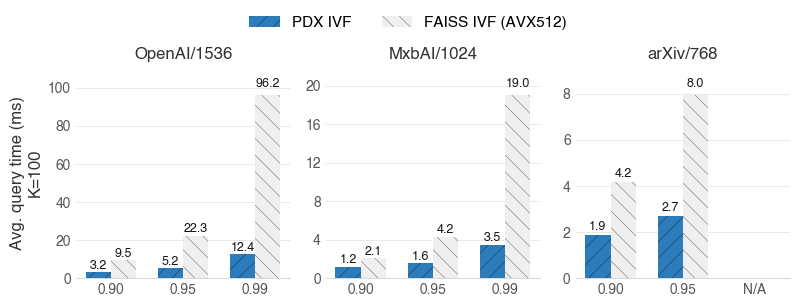

In [126]:
mpl.rcParams['hatch.linewidth'] = 0.2

# Data
x_labels = ["0.90", "0.95", "0.99"]
x = np.arange(len(x_labels))
bar_width = 0.35

# Query time data (FAISS, PDXearch)
data = {
    "OpenAI/1536": {
        "PDX IVF": [3.25, 5.19, 12.45],
        "FAISS IVF": [9.49, 22.31, 96.24],
    },
    "MxbAI/1024": {
        "PDX IVF": [1.19, 1.58, 3.48],
        "FAISS IVF": [2.09, 4.24, 19.03],
    },
    "arXiv/768": {
        "PDX IVF": [1.89, 2.69, 0],
        "FAISS IVF": [4.15, 7.95, 0],
    }
}

fig, axes = plt.subplots(1, 3, figsize=(8.1, 2.95), sharey=False)

colors = {
    "PDX IVF": "#2c7bba",
    "FAISS IVF": "#efefef",
}
hatches = {
    "PDX IVF": "//",
    "FAISS IVF": "\\\\",
}

# Font settings (estimated)
label_fontsize = 12
tick_fontsize = 10
x_tick_fontsize = 10
bar_label_fontsize = 9
font_color = "#333333"
tick_fonts_color = '#585858'
bar_text_color = '#191919'

for ax, (title, values) in zip(axes, data.items()):
    faiss_vals = values["FAISS IVF"]
    pdx_vals = values["PDX IVF"]
    
    # Bars
    ax.bar(x - bar_width / 2, pdx_vals, width=bar_width, label="PDX IVF",
           color=colors["PDX IVF"], hatch=hatches["PDX IVF"])
    ax.bar(x + bar_width / 2, faiss_vals, width=bar_width, label="FAISS IVF (AVX512)",
           color=colors["FAISS IVF"], hatch=hatches["FAISS IVF"])
    
    # Bar value labels
    for i in range(len(x)):
        offset_faiss = max(0.05, faiss_vals[i] * 0.03)
        offset_pdx   = max(0.05, pdx_vals[i] * 0.03)

        if faiss_vals[i] == 0.0:
            continue
        ax.text(x[i] + bar_width / 2, faiss_vals[i] + offset_faiss, f"{faiss_vals[i]:.1f}", 
                ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
        ax.text(x[i] - bar_width / 2, pdx_vals[i] + offset_pdx, f"{pdx_vals[i]:.1f}", 
                ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    
    # Ticks and labels
    ax.set_xticks(x)
    if title == "arXiv/768":
        x_labels[-1] = 'N/A'
    ax.set_xticklabels(x_labels, fontsize=x_tick_fontsize, color=tick_fonts_color)
    ax.set_title(title, fontsize=label_fontsize, color=font_color)
    
    # Grids (horizontal only)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='gray', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Spine adjustments (remove top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color((0, 0, 0, 0.15))

    # Y label only for first plot
    if title == "OpenAI/1536":
        ax.set_ylabel("Avg. query time (ms)\nK=100", fontsize=label_fontsize, color=font_color)

    # Set consistent Y limits per dataset
    max_y = max(max(faiss_vals), max(pdx_vals))
    ax.set_ylim(0, max_y * 1.15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(axis='y', colors=tick_fonts_color)
    ax.tick_params(axis='both', length=0)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False, fontsize=11, bbox_to_anchor=(0.51, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'./ivf-intel.png', format='png', dpi=600, bbox_inches='tight')

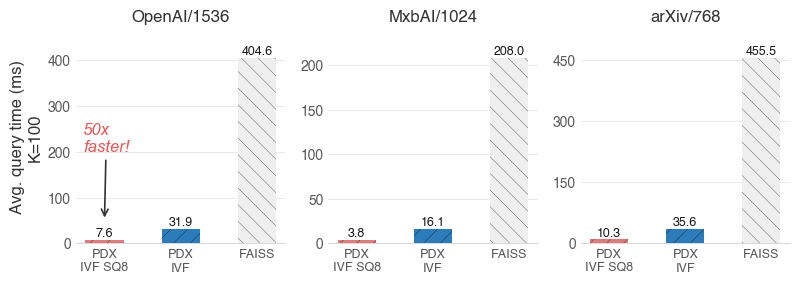

In [158]:
mpl.rcParams['hatch.linewidth'] = 0.2

# Data
x_labels = ["PDX\nIVF SQ8", "PDX\nIVF", "FAISS"]
x = np.arange(len(x_labels))
bar_width = 0.5

# Query time data (FAISS, PDXearch)
data = {
    "OpenAI/1536": [
        7.61, 31.90, 404.62
    ],
    "MxbAI/1024": [
        3.79, 16.06, 208.04
    ],
    "arXiv/768": [
        10.27, 35.62, 455.53
    ]
}

categories = ["PDX\nIVF SQ8", "PDX\nIVF", "FAISS"]
colors = ["#e07b7b", "#2c7bba", "#efefef"]
hatches = ["//", "//", "\\\\"]

fig, axes = plt.subplots(1, 3, figsize=(8.1, 3.1), sharey=False, tight_layout=True)

label_fontsize = 12
tick_fontsize = 10
x_tick_fontsize = 9
bar_label_fontsize = 9
font_color = "#333333"
tick_fonts_color = '#585858'
bar_text_color = '#191919'

for ax, (title, values) in zip(axes, data.items()):

    bars = []
    for i in range(len(categories)):
        bar = ax.bar(categories[i], values[i], width=bar_width, color=colors[i], hatch=hatches[i], label=categories[i])
        bars.append(bar)
    
    # Add value labels on top
    for bar_group in bars:
        bar = bar_group[0]
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f"{height:.1f}", ha='center', va='bottom', fontsize=9, color=bar_text_color)
    
    # Bars
    # bars = ax.bar(categories, values, color=colors)
    # for bar in bars:
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
    #             f"{height:.1f}", ha='center', va='bottom')
    # ax.bar(x - bar_width / 2, faiss_vals, width=bar_width, label="FAISS",
    #        color=colors["FAISS"], hatch=hatches["FAISS"])
    # ax.bar(x + bar_width / 2, pdx_vals, width=bar_width, label="PDXearch",
    #        color=colors["PDXearch"], hatch=hatches["PDXearch"])
    
    # # Bar value labels
    # for i in range(len(x)):
    #     offset_faiss = max(0.05, faiss_vals[i] * 0.03)
    #     offset_pdx   = max(0.05, pdx_vals[i] * 0.03)
    
    #     ax.text(x[i] - bar_width / 2, faiss_vals[i] + offset_faiss, f"{faiss_vals[i]:.1f}", 
    #             ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    #     ax.text(x[i] + bar_width / 2, pdx_vals[i] + offset_pdx, f"{pdx_vals[i]:.1f}", 
    #             ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    
    # Ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=x_tick_fontsize, color=tick_fonts_color)
    ax.set_title(title, fontsize=label_fontsize, color=font_color)
    
    # Grids (horizontal only)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='gray', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Spine adjustments (remove top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color((0, 0, 0, 0.15))

    # Y label only for first plot
    if title == "OpenAI/1536":
        ax.set_ylabel("Avg. query time (ms)\nK=100", fontsize=label_fontsize, color=font_color)
        ax.annotate( "50x\nfaster!", xytext=(-0.28, 200), xy=(0, 50),
                    fontsize=12, fontstyle='italic', fontfamily='Arial', color='#ea5555',
                    arrowprops=dict(
                        arrowstyle='->',
                        color='#333333',
                        linewidth=1.2
                    ))


    # Set consistent Y limits per dataset
    max_y = max(values)
    ax.set_ylim(0, max_y * 1.15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.tick_params(axis='y', colors=tick_fonts_color)
    ax.tick_params(axis='both', length=0)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower center", ncol=4, frameon=False, fontsize=8, bbox_to_anchor=(0.5, -0.1))
# fig.suptitle('OpenAI embeddings (n=1M, d=1536)', fontsize=13, x=0.52, y=0.925)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'./ivf-exhaustive-intel.png', format='png', dpi=600, bbox_inches='tight')

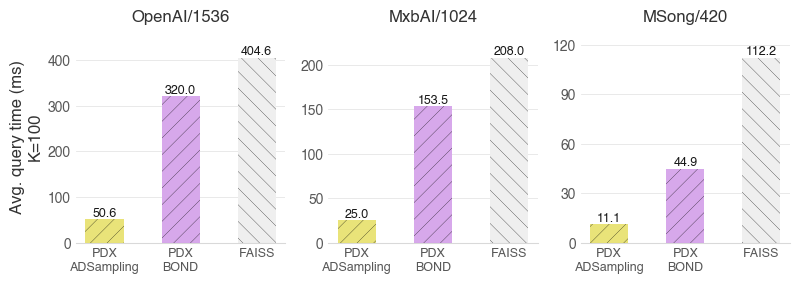

In [160]:
mpl.rcParams['hatch.linewidth'] = 0.2

# Data
x_labels = ["PDX\nADSampling", "PDX\nBOND", "FAISS"]
x = np.arange(len(x_labels))
bar_width = 0.5

# Query time data (FAISS, PDXearch)
data = {
    "OpenAI/1536": [
        50.62, 320.04, 404.62
    ],
    "MxbAI/1024": [
        24.97, 153.49, 208.04
    ],
    "MSong/420": [
        11.07, 44.9, 112.19
    ]
}

categories = ["PDX\nADSampling", "PDX\nBOND", "FAISS\nIVF"]
colors = ["#e9e379", "#d7a8eb", "#efefef"]
hatches = ["//", "//", "\\\\"]

fig, axes = plt.subplots(1, 3, figsize=(8.1, 3.1), sharey=False, tight_layout=True)

label_fontsize = 12
tick_fontsize = 10
x_tick_fontsize = 9
bar_label_fontsize = 9
font_color = "#333333"
tick_fonts_color = '#585858'
bar_text_color = '#191919'

for ax, (title, values) in zip(axes, data.items()):

    bars = []
    for i in range(len(categories)):
        bar = ax.bar(categories[i], values[i], width=bar_width, color=colors[i], hatch=hatches[i], label=categories[i])
        bars.append(bar)
    
    # Add value labels on top
    for bar_group in bars:
        bar = bar_group[0]
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f"{height:.1f}", ha='center', va='bottom', fontsize=9, color=bar_text_color)
    
    # Bars
    # bars = ax.bar(categories, values, color=colors)
    # for bar in bars:
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
    #             f"{height:.1f}", ha='center', va='bottom')
    # ax.bar(x - bar_width / 2, faiss_vals, width=bar_width, label="FAISS",
    #        color=colors["FAISS"], hatch=hatches["FAISS"])
    # ax.bar(x + bar_width / 2, pdx_vals, width=bar_width, label="PDXearch",
    #        color=colors["PDXearch"], hatch=hatches["PDXearch"])
    
    # # Bar value labels
    # for i in range(len(x)):
    #     offset_faiss = max(0.05, faiss_vals[i] * 0.03)
    #     offset_pdx   = max(0.05, pdx_vals[i] * 0.03)
    
    #     ax.text(x[i] - bar_width / 2, faiss_vals[i] + offset_faiss, f"{faiss_vals[i]:.1f}", 
    #             ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    #     ax.text(x[i] + bar_width / 2, pdx_vals[i] + offset_pdx, f"{pdx_vals[i]:.1f}", 
    #             ha='center', va='bottom', fontsize=bar_label_fontsize, color=bar_text_color)
    
    # Ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=x_tick_fontsize, color=tick_fonts_color)
    ax.set_title(title, fontsize=label_fontsize, color=font_color)
    
    # Grids (horizontal only)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='gray', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Spine adjustments (remove top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color((0, 0, 0, 0.15))

    # Y label only for first plot
    if title == "OpenAI/1536":
        ax.set_ylabel("Avg. query time (ms)\nK=100", fontsize=label_fontsize, color=font_color)


    # Set consistent Y limits per dataset
    max_y = max(values)
    ax.set_ylim(0, max_y * 1.15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.tick_params(axis='y', colors=tick_fonts_color)
    ax.tick_params(axis='both', length=0)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower center", ncol=4, frameon=False, fontsize=8, bbox_to_anchor=(0.5, -0.1))
# fig.suptitle('OpenAI embeddings (n=1M, d=1536)', fontsize=13, x=0.52, y=0.925)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'./bond-intel.png', format='png', dpi=600, bbox_inches='tight')